In [5]:
!pip install kagglehub

In [30]:
import os
print(os.getcwd())

C:\Users\ADMIN


Data loaded successfully! 
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Categ

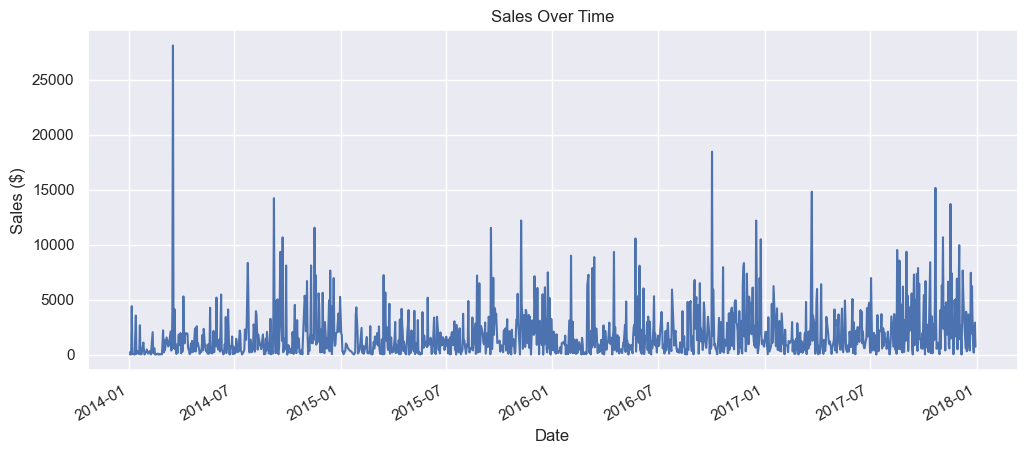

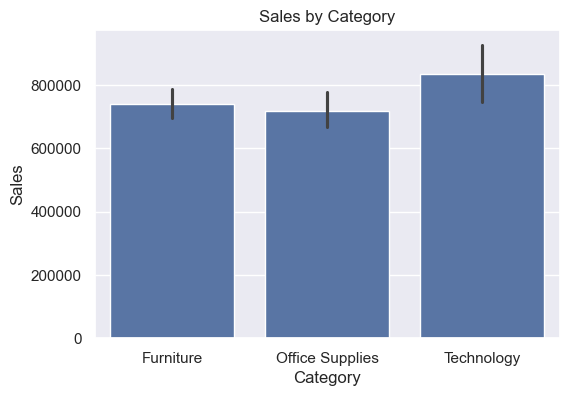

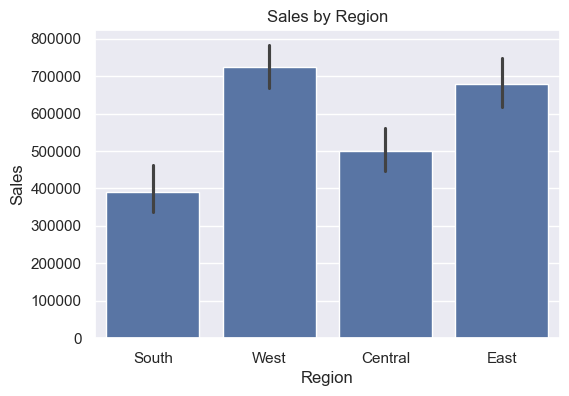

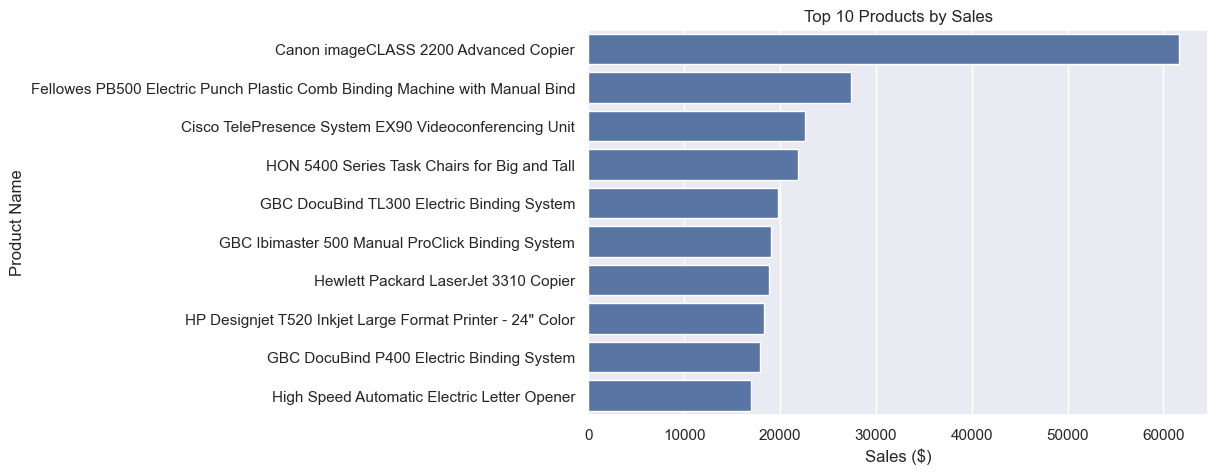

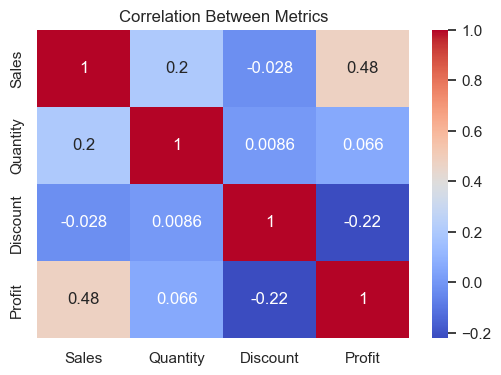

In [34]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visuals
plt.style.use('ggplot')
sns.set_theme()

#Loading of dataset
df = pd.read_csv("Superstore_sales.csv", encoding="latin-1")
print("Data loaded successfully! ")
print(df.head())

# info
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Handle missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Dropping rows with missing values (if any)
df = df.dropna()

# Convert date columns
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

#Calculate KPIs
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
total_orders = df["Order ID"].nunique()

print(f"\n💰 Total Sales: ${total_sales:,.2f}")
print(f"📈 Total Profit: ${total_profit:,.2f}")
print(f"📦 Total Orders: {total_orders}")

# Sales over time
sales_over_time = df.groupby("Order Date")["Sales"].sum()
plt.figure(figsize=(12,5))
sales_over_time.plot()
plt.title("Sales Over Time")
plt.ylabel("Sales ($)")
plt.xlabel("Date")
plt.show()

# Sales by category
plt.figure(figsize=(6,4))
sns.barplot(x="Category", y="Sales", data=df, estimator=sum)
plt.title("Sales by Category")
plt.show()

# Sales by region
plt.figure(figsize=(6,4))
sns.barplot(x="Region", y="Sales", data=df, estimator=sum)
plt.title("Sales by Region")
plt.show()

# Top 10 products by sales
top_products = df.groupby("Product Name")["Sales"].sum().nlargest(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales ($)")
plt.show()

#Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[["Sales", "Quantity", "Discount", "Profit"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Metrics")
plt.show()